In [23]:
#infile = "/nfs/disk1/users/amandabacon/LAPPD/lappd_analysis/output_lappd_0.root"
#infile = "/nfs/disk1/users/bharris/lappd_analysis/ppo-test_lappd_0.root"
#infile = "/nfs/disk1/users/bharris/lappd_analysis/oldoutputs/ppo-test_lappd_0.root"
infile = "/nfs/disk1/users/bharris/lappd_analysis2/processed/lappd-158-lab1.7ppo-beta-mask-band-blocker-500nm-lp-centered_lappd_1.root"
file_path0 = infile 

import uproot
import awkward as ak 
import matplotlib.pyplot as plt
import numpy as np

n_tup = uproot.open(file_path0)
meta = n_tup["meta;1"]
print(meta.keys())

meta_info = meta.arrays(meta.keys(),library = "ak")
print(meta_info['const_frac_threshold'])
output = n_tup["output"]
print(output.keys())
event_info = output.arrays(output.keys(),library = "ak")

lcns = event_info['lcns']
waveforms = event_info['waveforms']
print(lcns[0])
print(waveforms[0])

n=100

tres = []
raw = []
trigs = []

for i in range(len(waveforms[:n])):
    evtgroup0 = []
    evtgroup1 = []
    evtgroup2 = []
    evtgroup3 = []
    evttrig = []
    for j in range(len(waveforms[i])):
        if (lcns[i][j]<31):
            ped = ak.mean(waveforms[i][j][500:900])
            wf = waveforms[i][j][10:-10]
            amp = ak.max(wf-ped)
            if amp>30:
                crossed = wf-ped > (0.6*(ak.max(wf)-ped)) 
                above = ak.where(crossed)[0]
                # Need to add interpolation to get better time
                if len(above)>0:
                    if (lcns[i][j]<8):
                        evtgroup0.append(0.2*above[0])
                    if (7<lcns[i][j]<16):
                        evtgroup1.append(0.2*above[0])
                    if (15<lcns[i][j]<24):
                        evtgroup2.append(0.2*above[0])
                    if (23<lcns[i][j]<31): # 31 is coincident pmt trigger
                        evtgroup3.append(0.2*above[0])
        elif (lcns[i][j]>31): # trigger pmts 32,48,64,80
            ped = ak.mean(waveforms[i][j][100:500])
            wf = waveforms[i][j][100:-100]
            amp = ak.max(wf-ped)
            if amp>30:
                crossed = wf-ped > (0.6*(ak.max(wf)-ped)) 
                above = ak.where(crossed)[0]
                if len(above)>0:
                    evttrig.append(0.2*above[0])
    
    if len(evttrig)==4:
        for t in evttrig:
            trigs.append(t)
        for t in evtgroup0:
            tres.append(t-evttrig[0])
            raw.append(t)
        for t in evtgroup1:
            tres.append(t-evttrig[1])
            raw.append(t)
        for t in evtgroup2:
            tres.append(t-evttrig[2])
            raw.append(t)
        for t in evtgroup3:
            tres.append(t-evttrig[3])
            raw.append(t)


['nevents', 'nsamples', 'const_frac_threshold', 'dy', 'nfiles']
[0.6]
['lcns', 'times', 'peak_bins', 'peaks', 'pedestals', 'minmax', 'nsamples_above_threshold', 'waveforms']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ..., 25, 26, 27, 29, 30, 31, 32, 48, 64, 80]
[[2.24e+03, 2.24e+03, 2.24e+03, ..., 2.24e+03, 2.24e+03, 2.25e+03], ..., [...]]


Text(0, 0.5, 'Counts')

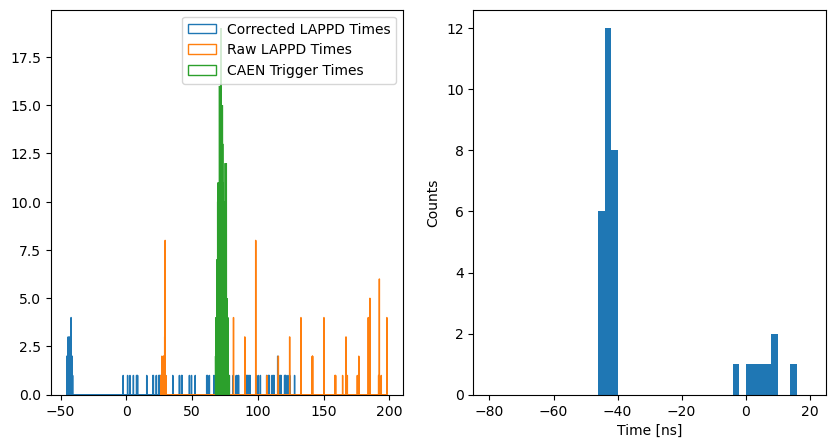

In [21]:

fig,ax = plt.subplots(1,2,figsize=(10,5))
bin_edges = np.arange(np.min(tres), np.max(tres) + 0.2, 0.2)
ax[0].hist(tres,bins=bin_edges,histtype='step',label='Corrected LAPPD Times');
ax[0].hist(raw,bins=1200,histtype='step',label='Raw LAPPD Times');
ax[0].hist(trigs,bins=1200,histtype='step',label='CAEN Trigger Times');
ax[0].legend()


import numpy as np
bin_edges = np.arange(-80, 20 + 2, 2)  # 0.0, 0.2, ..., 100.0

ax[1].hist(tres,bins=bin_edges,range=(-80,20));
ax[1].set_xlabel('Time [ns]')
ax[1].set_ylabel("Counts")

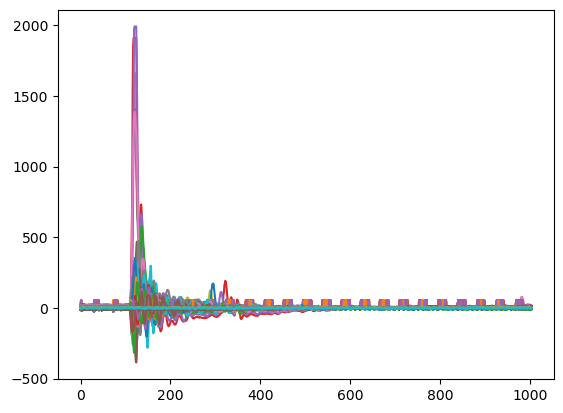

In [14]:

maxes = []
for i in range(len(waveforms[:n])):
     for j in range(len(waveforms[i])):
        if lcns[i][j]<31:
            wf = waveforms[i][j][10:-10] # this removes the peak at 20 adc i thought was signal... signals are larger
            ped = ak.mean(waveforms[i][j][500:900])
            maxes.append(ak.max(wf)-ped)
            plt.plot(wf-ped) # not in ns





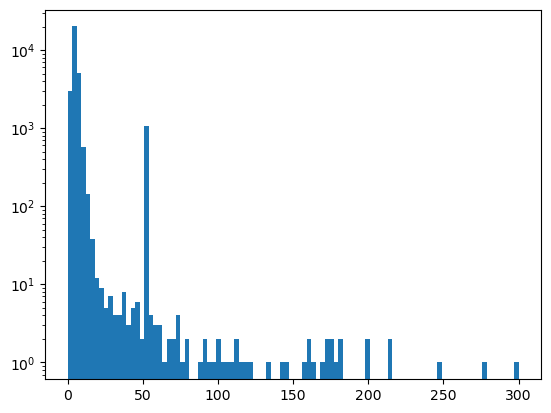

In [15]:

plt.hist(maxes,bins=100,range=(0,300))
plt.yscale('log')

In [24]:
print(event_info['times'])

[[188, 198, 184, 104, 196, 116, ..., 164, 66.8, 88.8, 91.8, 89.7, 89.3], ...]


In [ ]:
# testing